### Folla 7 - Integrales en varias dimensiones

Abril 2020

In [1]:
import time
print(' Last version ', time.asctime() )

 Last version  Wed Apr 14 15:39:14 2021


In [2]:
# general imports
%matplotlib notebook
# %matplotlib inline

%load_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import sympy as sp

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.style.context('seaborn-colorblind');
import graph_utils as gf

In [3]:
def line(ts, xfun, yfun, name = ''):
    xs = xfun(ts)
    ys = yfun(ts)
    plt.plot(xs, ys)
    plt.grid(True); plt.xlabel(r'$x$'); plt.ylabel(r'$y$')
    if name != '': plt.title(name)
    return

In [6]:
def uvmesh(a, b, v0, v1, w = None, nbins = 10):

    u = np.linspace(a, b, nbins) 
    v = np.linspace(0., 1, nbins)
    
    _v0 = v0 if callable(v0) else lambda u: v0
    _v1 = v1 if callable(v1) else lambda u: v1
    
    def _mesh(xx):
        return np.array(xx).flatten().reshape(nbins, nbins)

    uu, vv = [], []
    for ui in u:
        uu.append(u)
        vv.append(_v0(ui) + v * (_v1(ui) - _v0(ui)))
    uu, vv = _mesh(uu), _mesh(vv)
    uu = uu.T
      
    if (w is None):
        return uu, vv
    
    _w  = w if callable(w) else lambda u, v : 0.*u + 0*v + w 
    ww  = _w(uu, vv)
    return uu, vv, ww


In [7]:
x, y, z = sp.symbols('x y z')

In [8]:
def d2int(fun, xint, yint):
    return sp.integrate(sp.integrate(fun, xint), yint)

def d3int(fun, xint, yint, zint):
    return sp.integrate(d2int(fun, xint, yint), zint)

## Ejercicio 1

**Ejercicio 1.1**

$\int_R x^2 \sin (\pi y) \, \mathrm{d}x \mathrm{d}y, \;\;\;\; R = [0,1] \times [0, 1]$

$$
\frac{x^3}{3} \big|_0^1  \frac{-1}{\pi}\cos(\pi y) \big|_0^1 = \frac{1}{3} \frac{2}{\pi} = \frac{2 \pi}{3}
$$

In [9]:
d2int(x**2 * sp.sin(sp.pi * y), (x, 0., 1.), (y, 0., 1.))

0.666666666666667/pi

1.2 $\int_R y \,e^{-xy} \, \mathrm{d}x\mathrm{d}y \;\;\;\; R = [0, 1] \times [0, 1]$

$$
\int_0^1 -e^{-xy} \Big|_0^1 \mathrm{d}y = \int_0^1 (1 - e^{-y}) \mathrm{d}y = y + e^{-y} \Big|_0^1 = 1 + 1/e -1 = 1/e 
$$

In [10]:
d2int(y * sp.exp(- x * y), (x, 0., 1.), (y, 0., 1.))

0.367879441171442

In [11]:
sp.integrate(y * sp.exp(-x * y), (x, 0., 1))

1 - exp(-y)

In [12]:
sp.integrate(1 - sp.exp(-y), (y, 0., 1))

exp(-1)

**Ejercicio 1.3**

$\int_V (2x + 3 y + z) \, \mathrm{d}x\mathrm{d}y\mathrm{d}x, \;\;\;\; R = [0,1]\times[0,1]\times[0,1]$ 

$$
x^2 y z + \frac{3}{2} y^2 x z + \frac{1}{2} z^2 x y \Big|_0^1 \Big|_0^1 \Big|_0^1 = 1 + \frac{3}{2} + \frac{1}{2} = 3 
$$

In [13]:
d3int(2*x + 3*y + z, (x, 0., 1), (y, 0., 1.), (z, 0., 1.))

3.00000000000000

1.4 $\int \cos\left( \pi (x + y + z) \right) \, \mathrm{d}x\mathrm{d}y\mathrm{d}z, \;\;\; R = [2, 3] \times [1, 2] \times[0, 1]$  

$$
\int \frac{\sin \pi \, (x + y + z)}{\pi} \Big|_0^1 \mathrm{d}x \mathrm{d}y = \int - 2 \frac{\sin \pi \, (x + y)}{\pi } \mathrm{d}x \mathrm{d}y
$$

$$
\int 2 \frac{\cos\pi (x + y)}{\pi^2} \Big|_0^1 \mathrm{d}x = \int  4 \frac{\cos \pi x}{\pi^2 } \mathrm{d}x
$$

$$
4 \frac{\sin\pi  x}{\pi^2} \Big|_0^1  = 0
$$

In [14]:
sp.integrate(sp.cos(sp.pi * (x  + y  + z)), z)

sin(pi*(x + y + z))/pi

In [15]:
sp.simplify(sp.integrate(sp.cos(sp.pi * (x  + y  + z)), (z, 0, 1)))

-2*sin(pi*(x + y))/pi

In [16]:
sp.integrate(sp.simplify(sp.integrate(sp.cos(sp.pi * (x  + y  + z)), (z, 0, 1))), y)

2*cos(pi*(x + y))/pi**2

In [17]:
sp.simplify(sp.integrate(sp.simplify(sp.integrate(sp.cos(sp.pi * (x  + y  + z)), (z, 0, 1))), (y, 1, 2)))

4*cos(pi*x)/pi**2

In [18]:
sp.integrate(4 * sp.cos(sp.pi * x) / sp.pi, x)

4*sin(pi*x)/pi**2

In [19]:
sp.integrate(4 * sp.cos(sp.pi * x) / sp.pi, (x, 2, 3))

0

In [20]:
d3int(sp.cos(np.pi * (x + y + z)), (x, 2., 3.), (y, 1., 2), (z, 0., 1))

1.42188258280350e-16

**Ejercicio 1.5**

$\int_V e^{x+y+z} \, \mathrm{d}x\mathrm{d}y\mathrm{d}z, \;\;\; R = [0, 1] \times [0, 1] \times[0, 1]$  

$$
e^x \Big|_0^1 e^y \Big|_0^1 e^z \Big|_0^1 = (e-1)^3
$$

In [ ]:
sp.simplify(sp.integrate(sp.exp(x + y+ z), (x, 0, 1)))

In [ ]:
sp.integrate(sp.simplify(sp.integrate(sp.exp(x + y+ z), (x, 0, 1))), (y, 0., 1.))

In [21]:
-1 + np.e

1.718281828459045

## Ejercicio 2

**Ejercicio 2.1**

$
\int_0^\pi \int_{\sin x}^{3 \sin x} x (1 + y) \mathrm{d}x\mathrm{d}y
$

<IPython.core.display.Javascript object>


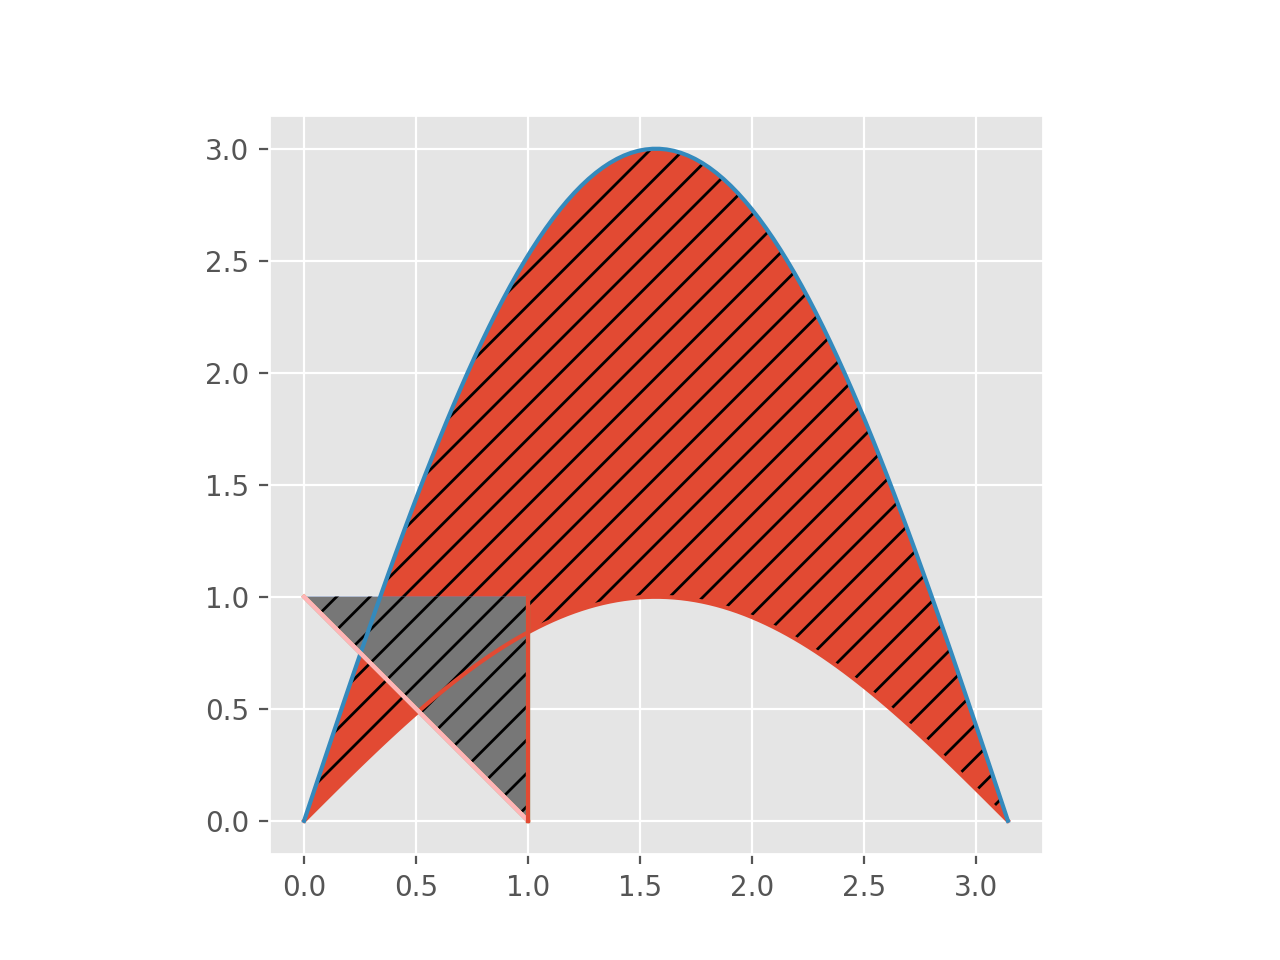

In [22]:
xs  = np.linspace(0., np.pi, 100)
y0s = np.sin(xs) 
y1s = 3 * np.sin(xs)
plt.plot(xs, y0s);
plt.plot(xs, y1s)
plt.fill_between(xs, y0s, y1s, hatch= '//');

$$
\int_0^\pi x \left( y + \frac{y^2}{2} \right) \Big|_{\sin x}^{3\sin x} \mathrm{d}x = \int_0^\pi x \left( 3 \sin x + \frac{9}{2} \sin^2 x - \sin x - \frac{\sin^2 x}{2} \right) \mathrm{d}x = \int_0^\pi x (4 \sin^2 x + 2 \sin x) \mathrm{d}x
$$



Como $\sin^2 x = \frac{1}{2} (1 - \cos 2 x)$

$$
\int_0^\pi 2x ( 1 - \cos 2x + \sin x) \mathrm{d}x = \\
x^2 - x \sin 2x - \frac{1}{2} \cos 2x - 2 x \cos x + 2 \sin x \Big|_0^\pi = \\
\pi^2 - \frac{1}{2} + 2 \pi + \frac{1}{2} = \pi^2 + 2 \pi
$$

donde
$$
\int x \cos 2x \, \mathrm{d}x = \frac{x}{2}\sin 2x + \frac{1}{4} \cos 2x  
$$

$$
\int x \sin x \, \mathrm{d}x = - x \cos x + \sin x 
$$


In [ ]:
sp.integrate(x * sp.sin(x), x)

In [ ]:
sp.integrate(x * ( 1 + y), y)

In [ ]:
sp.integrate(x * ( 1 + y), (y, sp.sin(x), 3 * sp.sin(x)))

In [ ]:
sp.integrate(sp.integrate(x * ( 1 + y), (y, sp.sin(x), 3 * sp.sin(x))), x)

In [ ]:
sp.simplify(sp.integrate(sp.integrate(x * ( 1 + y), (y, sp.sin(x), 3 * sp.sin(x))), x))

In [ ]:
sp.integrate(sp.integrate(x * ( 1 + y), (y, sp.sin(x), 3 * sp.sin(x))), (x, 0, sp.pi))

In [ ]:
d2int(x * (1 + y), (y, sp.sin(x), 3 * sp.sin(x)), (x, 0, sp.pi))

**Ejercicio 2.2**

$$
\int_0^4 \int_0^{\sqrt{x}} (x^2 + y^2) \, \mathrm{d}x \mathrm{d}y
$$

In [ ]:
xs  = np.linspace(0., np.pi, 100)
y0s = np.zeros(100)
y1s = np.sqrt(xs)
plt.plot(xs, y0s);
plt.plot(xs, y1s)
plt.fill_between(xs, y0s, y1s, hatch= '//'); plt.gca().set_aspect('equal')

$$
\int_0^4 x^2  y +  \frac{y^3}{3} \Big|_0^{\sqrt{x}} \mathrm{d}x = \int_0^4 x^{5/2} + \frac{x^{3/2}}{3}\mathrm{d}x = \frac{2}{7} x^{7/2} + \frac{2}{15} x^{5/2} \Big|_0^4 = \frac{2^8}{7} + \frac{2^6}{15}
$$

In [ ]:
(2**8  * 15 + 2**6 * 7), 7 * 15

In [ ]:
d2int(x**2 + y**2, (y, 0., sp.sqrt(x)), (x, 0, 4))

In [ ]:
sp.integrate(x**2 + y**2, y)

In [ ]:
sp.integrate(x**2 + y**2, (y, 0, sp.sqrt(x)))

In [ ]:
sp.integrate(sp.integrate(x**2 + y**2, (y, 0, sp.sqrt(x))), x)

In [ ]:
sp.integrate(sp.integrate(x**2 + y**2, (y, 0, sp.sqrt(x))), (x, 0, 4))

**Ejercicio 2.3**

$$
\int_0^1 \int_{1-y}^1 (x+y)^2 \mathrm{d}x \mathrm{d}y
$$

<IPython.core.display.Javascript object>


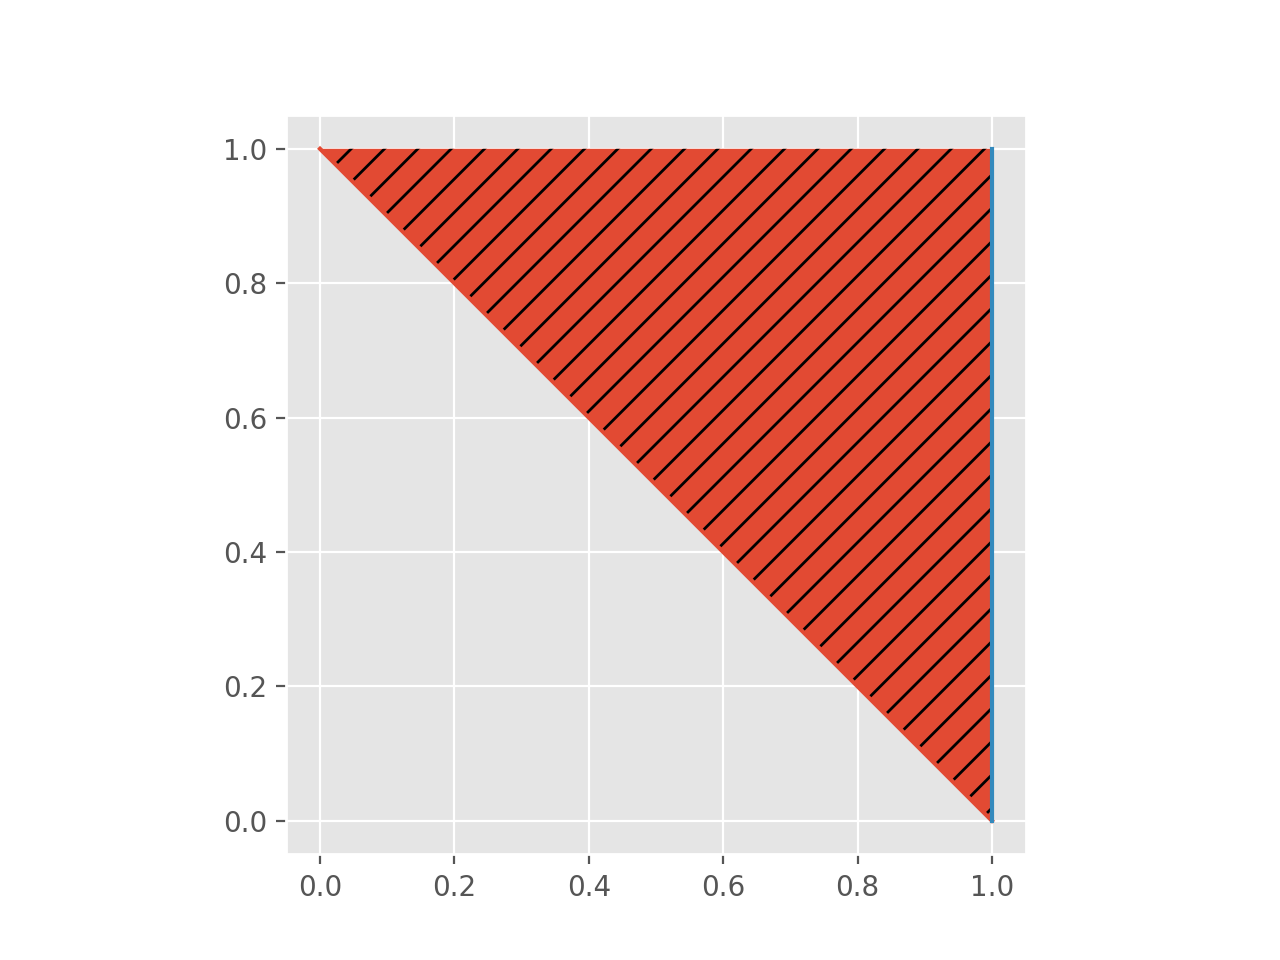

In [26]:
ys  = np.linspace(0., 1., 100)
x0s = 1-ys
x1s = np.ones(100)
plt.figure()
plt.plot(x0s, ys);
plt.plot(x1s, ys)
plt.fill_betweenx(x0s, x1s, ys, hatch= '//');
plt.gca().set_aspect('equal', adjustable='box')

$$
\int_0^1 \int_{1-y}^1 x^2 + 2x y + y^2 \, \mathrm{d}x \mathrm{d}y = \int_0^1 \frac{x^3}{3} + x^2 y + x y^2 \, \Big|_{1-y}^1 \, \mathrm{d}y
$$

$$
\int_0^1 \left[ \frac{1}{3} + y + y^2 - (1-y) \left( \frac{(1-y)^2}{3} + (1-y) y  + y^2\right) \right]\, \mathrm{d}y
$$

$$
\int_0^1 \left[ \frac{1+3y+3y^2}{3} - (1-y) \left( \frac{1-2y + y^2}{3} +y -y^2 + y^2 \right)\right] \mathrm{d}y
$$

$$
\int_0^1 \frac{1}{3}  \left[ 1 + 3y + 3y^2 - (1-y) (1 + y + y^2)  \right] \mathrm{d}y 
$$

$$
\int_0^1 \frac{1}{3}  \left[ 1 + 3y + 3y^2 - 1 - y - y^2 + y + y^2 + y^3)  \right] \mathrm{d}y 
$$

$$
\int_0^1 y \left( 1 + y + \frac{y^2}{3}\right) \, \mathrm{d} y = \frac{y^2}{2} + \frac{y^3}{3} + \frac{y^4}{12} \Big|_0^1 = \frac{6 + 4 + 1}{12} = \frac{11}{12}
$$

In [ ]:
sp.integrate((x+y)**2, x)

In [ ]:
sp.integrate((x+y)**2, (x, 1-y, 1))

In [ ]:
sp.simplify(sp.integrate((x+y)**2, (x, 1-y, 1)))

In [ ]:
sp.simplify(sp.integrate((x+y)**2, (x, 1-y, 1)))

In [ ]:
sp.integrate(sp.integrate((x+y)**2, (x, 1-y, 1)), y)

In [ ]:
sp.integrate(sp.integrate((x+y)**2, (x, 1-y, 1)), (y, 0, 1))

**Ejercicio 2.4**

$$
\int (2x^2 + y^2) \mathrm{d}x \mathrm{d}y
$$

En Polares, recordemos que $|J| = r$

$$
\int_0^a \int_0^{\pi/2} (r^2 \cos^2 \phi + r^2) \, r \mathrm{d}r \mathrm{d} \phi
$$

Que descomponemos en:

$$
i) \; \int_0^a \int_0^{\pi/2} r^3 \, \mathrm{d}r \mathrm{d} \phi = \frac{r^4}{4} \Big|_0^a \phi \Big|_0^{\pi/2} = \frac{\pi a^4}{8}
$$

$$
ii) \; \int_0^a \int_0^{\pi/2} r^3 \cos^2 \phi \, \mathrm{d}r \mathrm{d} \phi = \frac{r^4}{4} \Big|_0^a \frac{1}{2} \left(\phi + \frac{\sin 2 \phi}{2} \right)  \Big|_0^{\pi/2} = \frac{\pi a^4}{16}
$$

Por lo tanto

$$
\frac{\pi a^4}{8} + \frac{\pi a^4}{16} = \frac{3 \pi a^4}{16}
$$


<IPython.core.display.Javascript object>


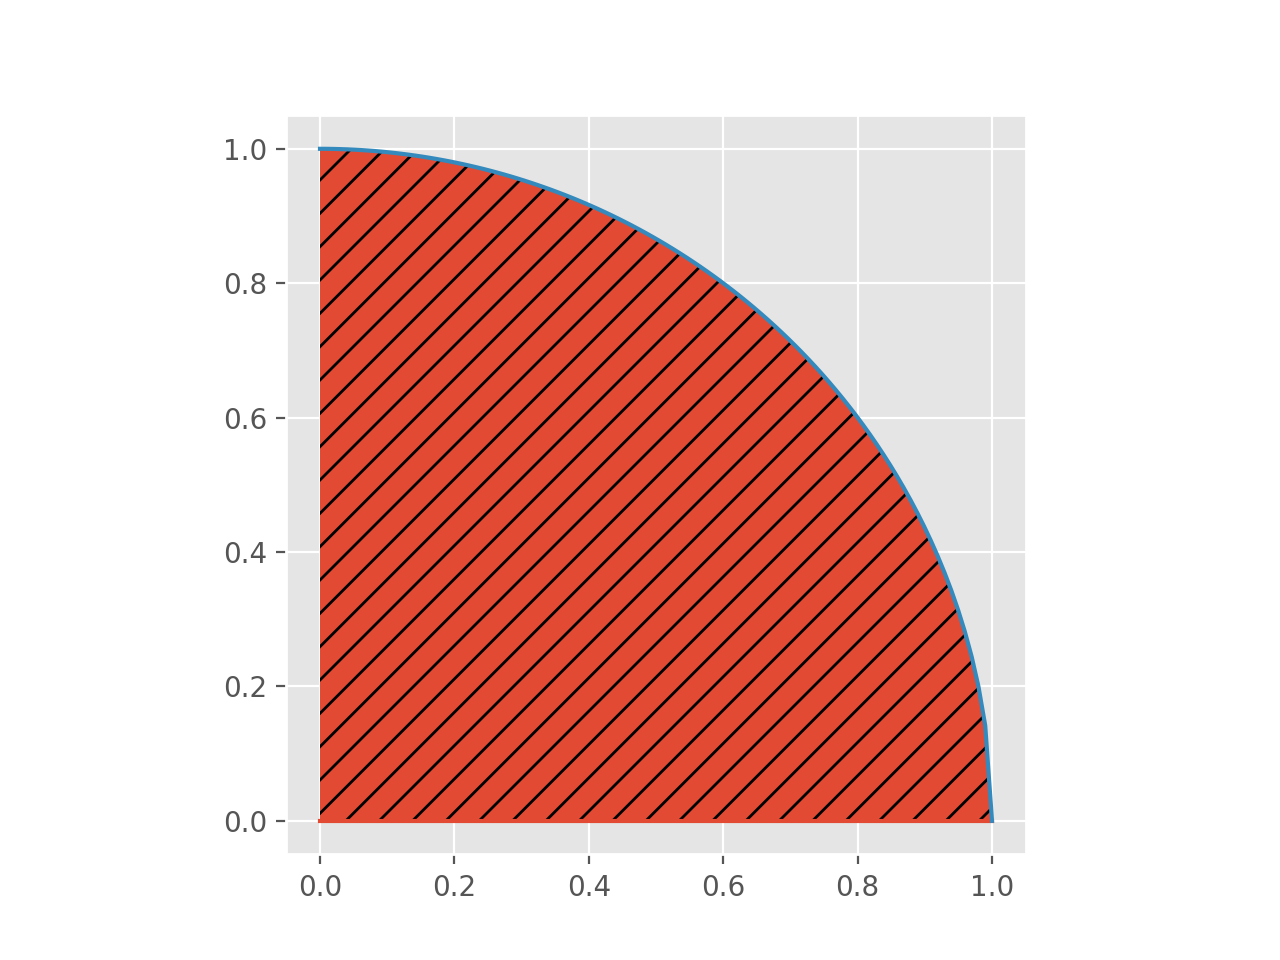

In [27]:
a = 1
xs  = np.linspace(0., a**2, 100)
y0s = np.zeros(100)
y1s = np.sqrt(a**2 - xs**2)
plt.figure()
plt.plot(xs, y0s);
plt.plot(xs, y1s)
plt.fill_between(xs, y0s, y1s, hatch= '//');
plt.gca().set_aspect('equal', adjustable='box')

In [ ]:
r, theta, a = sp.symbols('r theta a')

d2int( r*(r*sp.cos(theta))**2 + r**3, (r, 0, a), (theta, 0., sp.pi/2))

In [ ]:
sp.integrate(  r* (r*sp.cos(theta))**2, (r, 0, a))

In [ ]:
sp.integrate(sp.integrate( (r*sp.cos(theta))**2, (r, 0, a)), theta)

In [ ]:
sp.integrate(sp.integrate( r * (r*sp.cos(theta))**2, (r, 0, a)), (theta, 0, sp.pi/2))

In [ ]:
sp.integrate(sp.integrate( r * r**2, (r, 0, a)), (theta, 0, sp.pi/2))

In [ ]:
sp.integrate(sp.integrate( r**3 * sp.cos(theta)**2 + r**3, (r, 0, a)), (theta, 0, sp.pi/2))

**ejercicio 2.5**

$$
\int_0^1 \int_0^{2x} \int_{x^2+y^2}^{x+y} \mathrm{d}z\mathrm{d}y\mathrm{d}x
$$

<IPython.core.display.Javascript object>


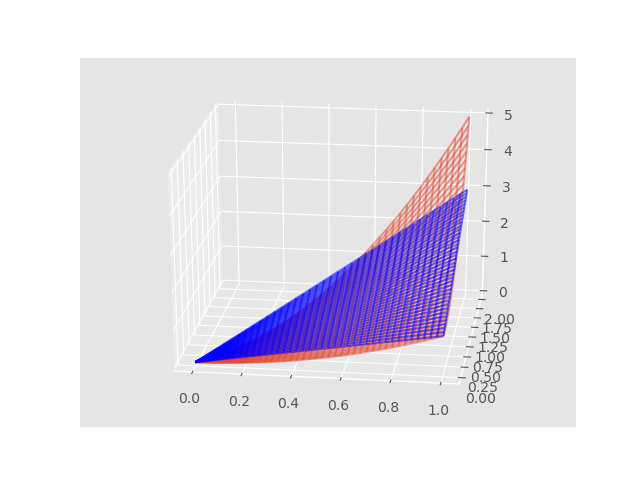

In [202]:
nbins   = 40 
u, v, w = uvmesh(0., 1., 0., lambda u : 2 * u, lambda u, v : u*u + v*v, nbins) 
plt.figure(); ax = plt.gca(projection = '3d')
ax.plot_wireframe(u, v, w, alpha = 0.5);
u, v, w = uvmesh(0., 1., 0., lambda u : 2 * u, lambda u, v : u + v, nbins) 
ax.plot_wireframe(u, v, w, alpha = 0.5, color = 'blue');

<IPython.core.display.Javascript object>


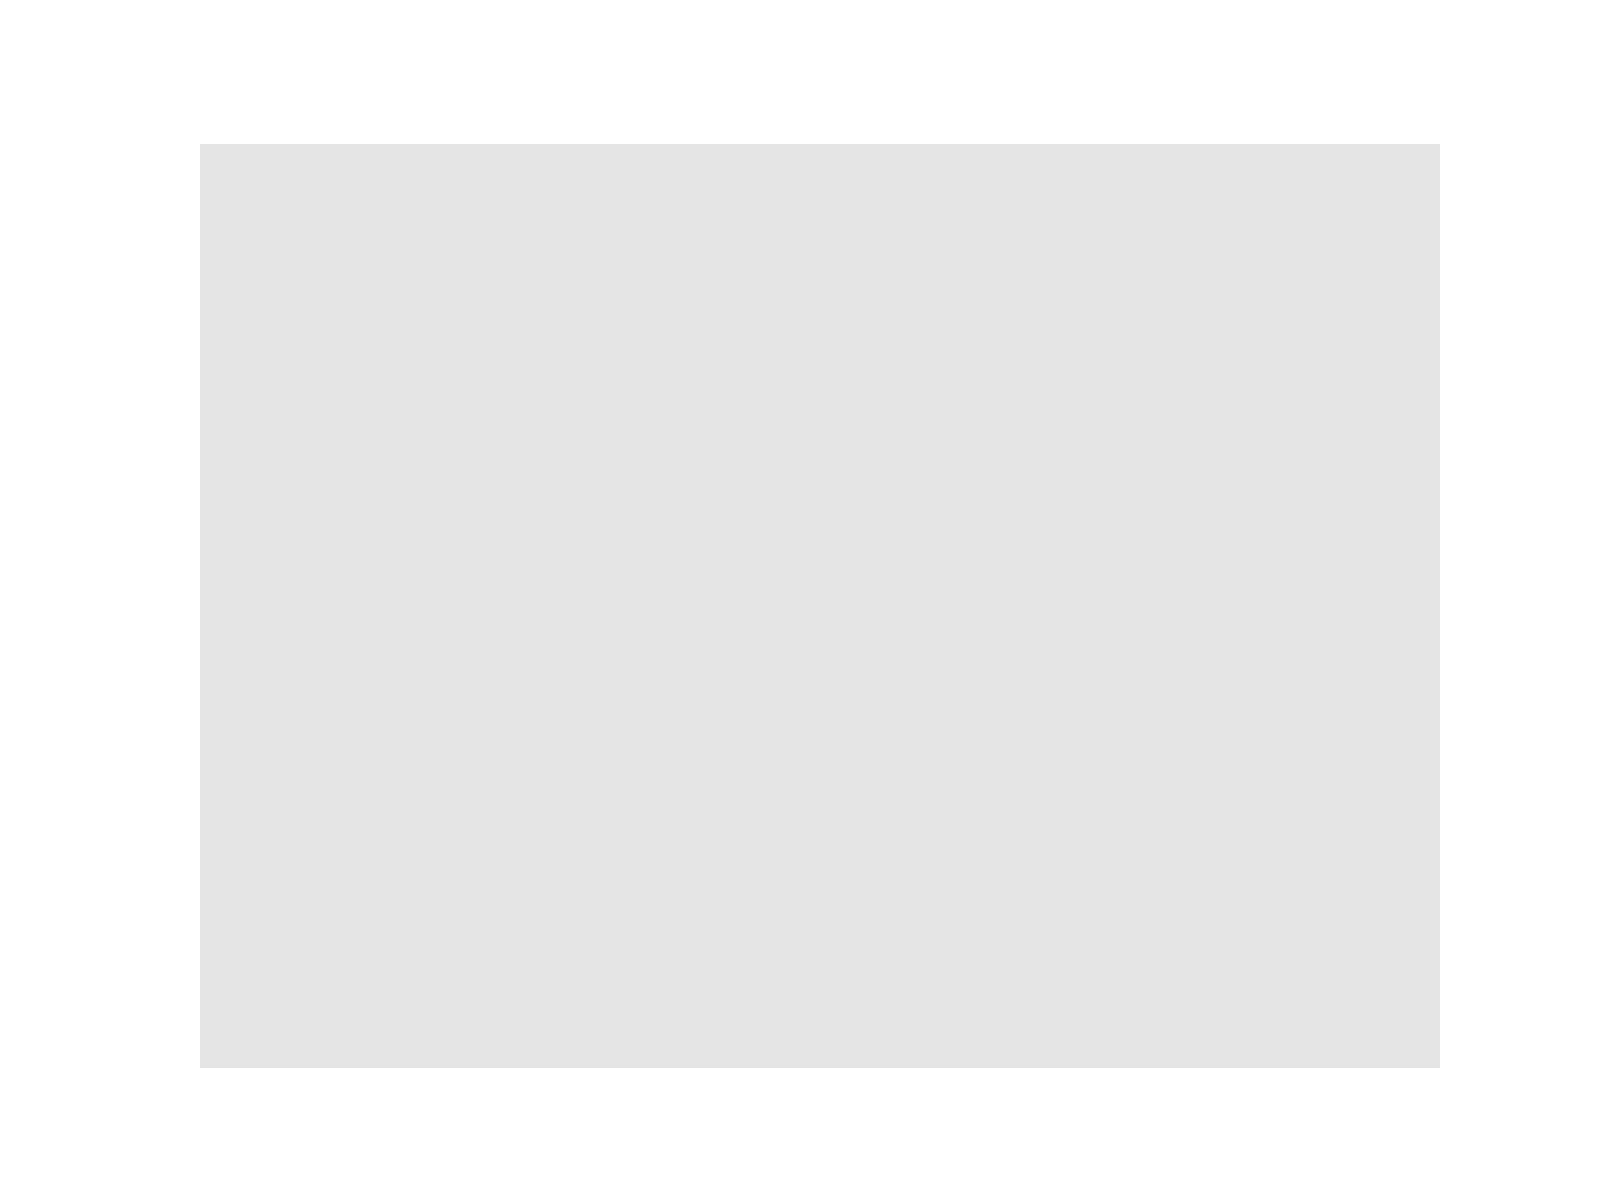

In [29]:
urange = (0., 1., 100)
vrange = (0., 2., 100)
xfun  = lambda u, v : u
yfun  = lambda u, v : np.minimum(v, 2*u)
zfun1 = lambda u, v : u*u + np.minimum(v, 2*u) *np.minimum(v, 2*u)
zfun2 = lambda u, v : u   + np.minimum(v, 2*u) 
zfun0 = lambda u, v : 0*u + 0 *v
gf.wfsurface(xfun, yfun, zfun1, urange, vrange, alpha = 0.8, color = 'r');
gf.wfsurface(xfun, yfun, zfun2, urange, vrange, alpha = 0.8, color = 'b', newfig = False);
#gf.wfsurface(xfun, yfun, zfun0, urange, vrange, alpha = 0.8, color = 'black', newfig = False)
#gf.wfsurface(xfun, cero, zfun, rrange, phirange, alpha = 0.2, color = 'r', newfig = False)
#gf.wfsurface(cero, yfun, zfun, rrange, phirange, alpha = 0.2, color = 'r', newfig = False);

$$
\int_0^1 \int_0^{2x} z \Big|_{x^2 + y^2}^{x+y} \mathrm{d}y\mathrm{d}x = 
\int_0^1 \int_0^{2x} x +y  -x^2 - y^2 \mathrm{d}y\mathrm{d}x 
$$

$$
\int_0^1 (x-x^2) y + \frac{y^2}{2} - \frac{y^3}{3} \Big|_0^{2x} \mathrm{d}x = 
\int_0^1 2 x (x-x^2) + 2 x^2 - \frac{8}{3} x^3 \, \mathrm{d}x
$$

$$
\int_0^1 2x^2 - 2 x^3 + 2x^2 - \frac{8}{3}x^3 \, \mathrm{d}x = 
\int_0^1 4 x^2 -\frac{14}{3} x^3 \, \mathrm{d}x = 
$$

$$
 \frac{4}{3} x^3 - \frac{14}{12} x^4 = \frac{16 - 14}{12} = \frac{1}{6} 
$$


$$
\int_0^1 2x^2 - x^3 + 2x^2 + \frac{8}{3}x^3 \, \mathrm{d}x
$$

In [ ]:
sp.integrate(1, (z, x**2 + y**2, x+y))

In [ ]:
sp.integrate(sp.integrate(1, (z, x**2 + y**2, x+y)), y)

In [ ]:
sp.simplify(sp.integrate(sp.integrate(1, (z, x**2 + y**2, x+y)), (y, 0, 2 * x)))

In [ ]:
sp.integrate(sp.integrate(sp.integrate(1, (z, x**2 + y**2, x+y)), (y, 0, 2 * x)), x)

In [ ]:
sp.integrate(sp.integrate(sp.integrate(1, (z, x**2 + y**2, x+y)), (y, 0, 2 * x)), (x, 0, 1))

In [ ]:
d3int(1, (z, x*x + y*y, x + y), (y, 0., 2*x), (x, 0., 1))

## Ejercicio 4

**Ejercicio 4.1**

$$
\int_R \frac{x}{1 + x^2 y^2} \, \mathrm{d}x\mathrm{d}y
$$

con $x = u, \; y = \frac{v}{u}$

<IPython.core.display.Javascript object>


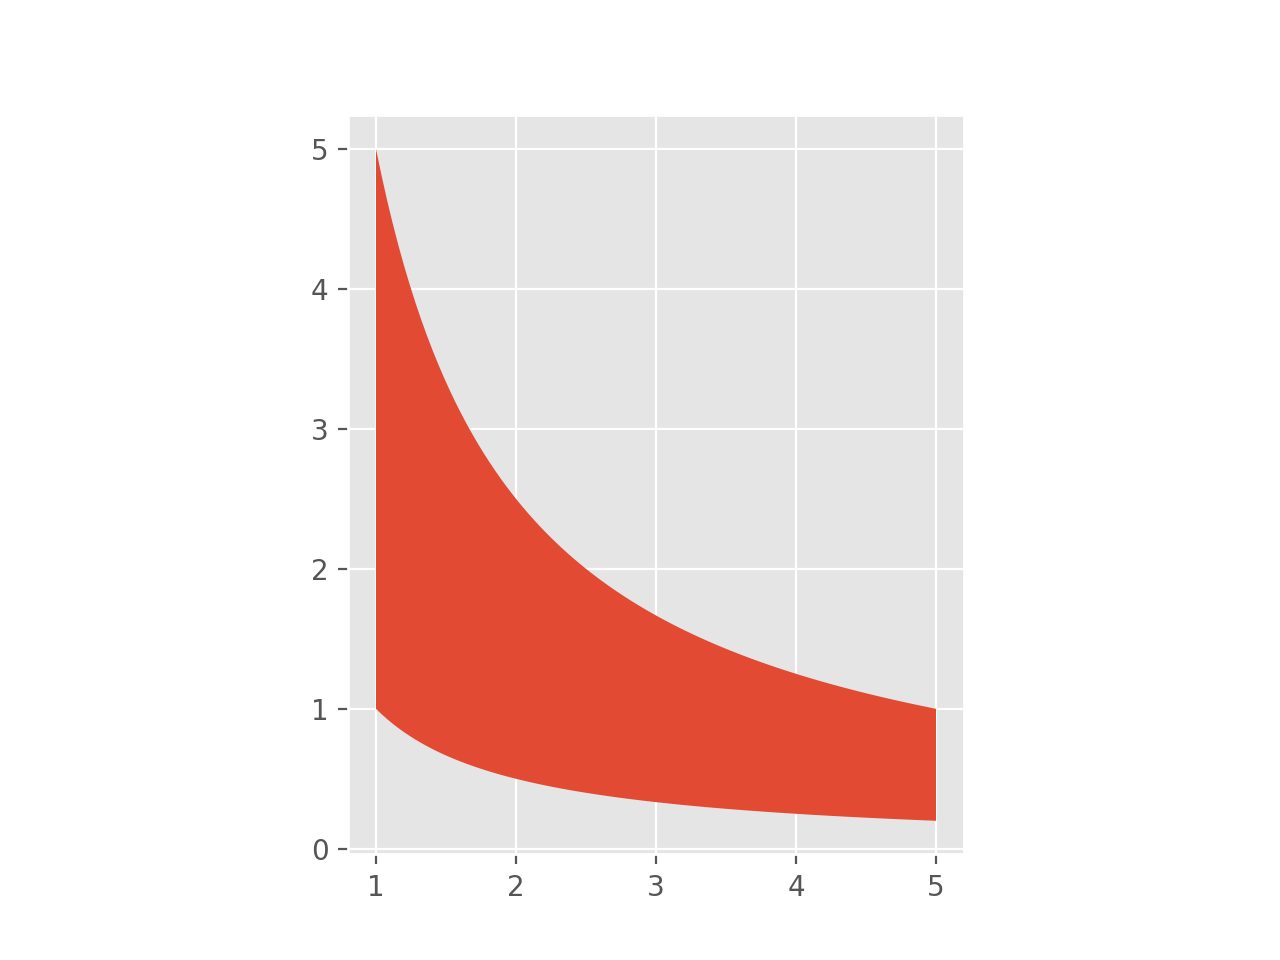

In [31]:
yup   = lambda x: 5./x
ydown = lambda x: 1./x
xs = np.linspace(1., 5., 100)

plt.figure();
plt.fill_between(xs, ydown(xs), yup(xs));
plt.gca().set_aspect('equal');


Con $x =u, \; y = \frac{v}{u}$

La Región:
$$
x y = 1 \, (5); \; v = 1 \,(5); \;\; x = 1 \, (5); u = 1 \, (5) \Rightarrow 1 \le u \le 5, \; 1 \le v \le 5
$$


El Jacobiano:
$$
J = \left| \begin{array}{cc} 1 & 0 \\ 
-\frac{v}{u^2} & \frac{1}{u}
\end{array} \right| = \frac{1}{u}
$$

La función:
$$
f(u, v) = \frac{u}{1 + v^2}
$$



$$
\int_1^5 \int_1^5 \frac{u}{1+v^2} \frac{1}{u} \mathrm{d}u\mathrm{d}v = 
\int_1^5 \frac{1}{1+v^2} \mathrm{d}u\mathrm{d}v \\
$$

$$
u \Big|_1^5 \arctan v \Big|_1^5 = 4 ( \arctan 5 - \arctan 1) = 4 \arctan 5 - \pi
$$

In [32]:
sp.integrate(sp.integrate(1/(1+x**2), (y, 1, 5)), (x, 1, 5))

-pi + 4*atan(5)

In [33]:
sp.atan(1)

pi/4

**Ejercicio 4.2**

$$
\int_R 3 xy \mathrm{d}x \mathrm{d}y
$$

Con el cambio: $x = \frac{1}{3}(2u+v), \;\, y = \frac{1}{3}(u - v)$

La región:

$$
x+y = 1, \; \frac{1}{3}(2u+v) + \frac{1}{3} (u - v) = 1, \; u = 1 \\
x+y = 4, \; u = 4 \\
x-2y = 0, \; \frac{1}{3}(2u+v) - \frac{2}{3} (u - v) = 0, \; v = 0 \\
x-2y = -4, \; v  = -4
$$

$$
R = \{ 1 \le u \le 4, -4 \le v \le 0 \}
$$

El jacobiano:


El Jacobiano:
$$
J = \left| \begin{array}{cc} \frac{2}{3} & \frac{1}{3} \\ 
\frac{1}{3} & \frac{-1}{3}
\end{array} \right| = \frac{-1}{3}, \Rightarrow |J| = \frac{1}{3}
$$

La función:
$$
f(u, v) = \frac{1}{3}(2u+v)(u-v) = \frac{1}{3} (2u^2 + uv - v^2) 
$$


$$
\int_1^4 \int_{-4}^0 \frac{1}{9} (2u^2 + uv - v^2) \, \mathrm{d}u\mathrm{d}v
$$

$$
\int_1^4 \frac{1}{9} \left[ 2 u^2 v + \frac{1}{2}u v^2 - \frac{1}{3}v^3 \right]_{-4}^0 \, \mathrm{d}u = 
\int_1^4  8 u^2 - 8 u -  \frac{64}{3} \, \mathrm{d}u
$$

$$
\frac{1}{9} \left[ \frac{8}{3} u^3 - 4 u^2 - \frac{64}{3}u \right]_{1}^4 \, \mathrm{d}u = \frac{44}{9}
$$

In [34]:
fun = lambda u : 8 * u**3 - 3 * 4 * u**2 - 64 * u

print(fun(4), fun(1), fun(4)-fun(1), ' => ', (fun(4)-fun(1))/3)


64 -68 132  =>  44.0


In [35]:
sp.integrate(2*x**2 + x*y - y**2, y)

2*x**2*y + x*y**2/2 - y**3/3

In [36]:
sp.integrate(2*x**2 + x*y - y**2, (y, -4, 0))

8*x**2 - 8*x - 64/3

In [37]:
sp.integrate(sp.integrate(2*x**2 + x*y - y**2, (y, -4, 0)), x)

8*x**3/3 - 4*x**2 - 64*x/3

In [38]:
sp.integrate(sp.integrate(2*x**2 + x*y - y**2, (y, -4, 0)), (x, 1, 4))

44

## Ejercicio 3


Calcula el volumen limitado por las siguientes ecuaciones

**Ejercicion 3.1**

$x = y, \; z = 0, \; y = 0, \; x = 1, x + y + z = 0$

$$
\{ 0 \le x \le 1, \;\; 0 \le y \le x, \;\; -x - y \le z \le 0\}
$$

$$
\int_0^1 \int_0^x \int_{-x-y}^0 \mathrm{d}x \mathrm{d}y \mathrm{d} z = \\
\int_0^1 \int_0^x   z \Big|_{-x-y}^0 \mathrm{d}x \mathrm{d}y = \\
\int_0^1 \int_0^x   x +y  \; \mathrm{d}x \mathrm{d}y = \\
\int_0^1 \int_0^x   x y + \frac{y^2}{2}  \Big|_0^x\; \mathrm{d}x = \\
\int_0^1 \int_0^x   \frac{3x^2}{2}  \mathrm{d}x = \frac{x^3}{2} \Big|_0^1 = \frac{1}{2}
$$

<IPython.core.display.Javascript object>


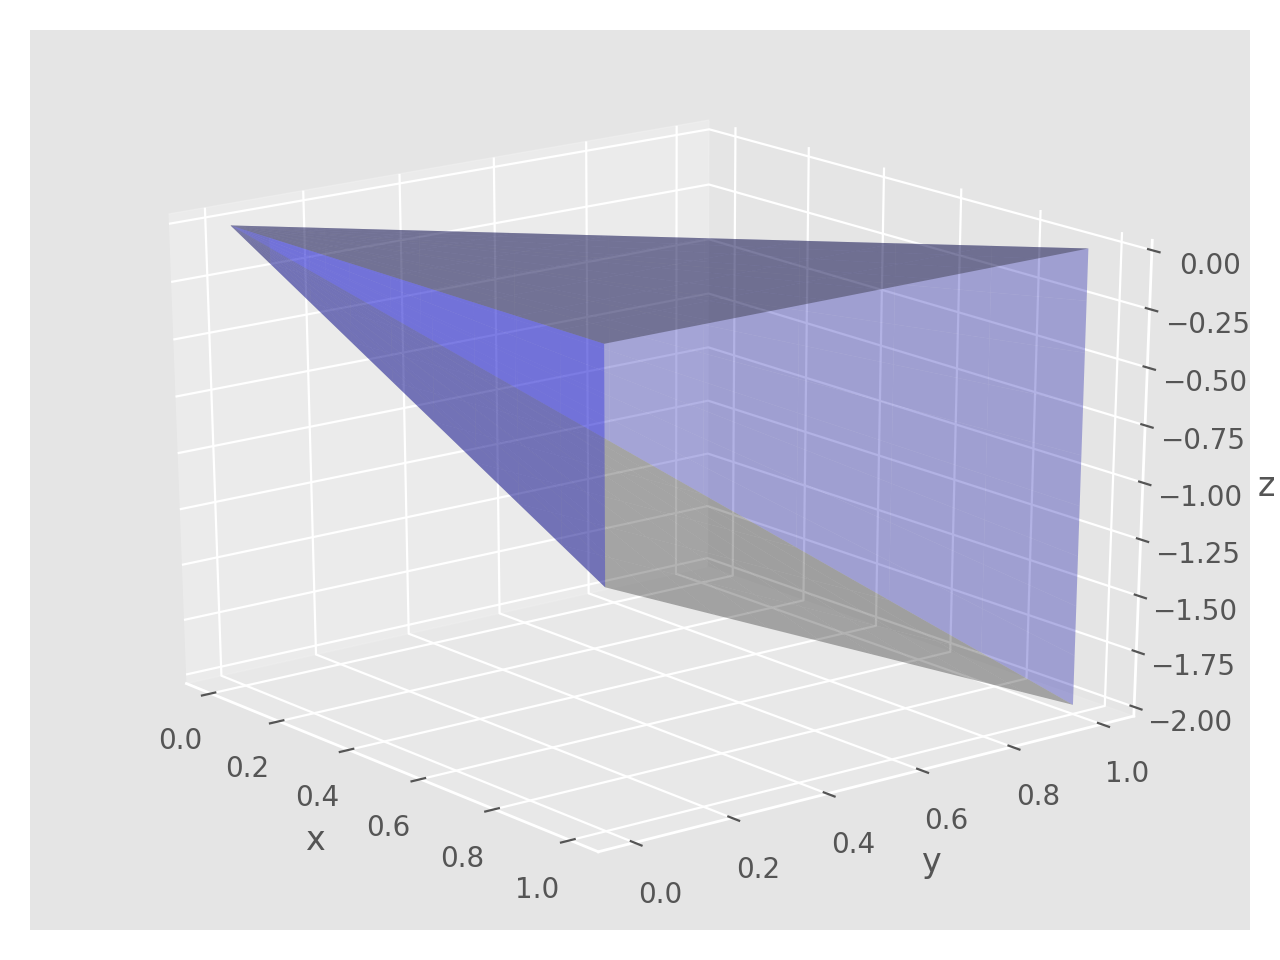

In [43]:
plt.figure()
ax = plt.gca(projection = '3d')
uu, vv, ww = uvmesh(0., 1., 0., lambda u: u, 0.)
draw = ax.plot_surface
draw(uu, vv, ww, alpha = 0.3, color = 'black')
uu, vv, ww = uvmesh(0., 1., 0., lambda u: u, lambda u, v: -u - v)
draw(uu, vv, ww, alpha = 0.3, color = 'black')
uu, vv, ww = uvmesh(0., 1., 0., lambda u: -u, 0.)
draw(uu, ww, vv, alpha = 0.3, color = 'blue')
uu, vv, ww = uvmesh(0., 1., 0., lambda u : - 2*u, lambda u, v : u)
draw(uu, ww, vv, alpha = 0.3, color = 'blue');
plt.xlabel('x'); plt.ylabel('y'); ax.set_zlabel('z'); plt.tight_layout();

In [44]:
x, y, z = sp.symbols('x y z')
print(sp.integrate(1, (z, -x - y, 0)))
print(sp.integrate(sp.integrate(1, (x, -x - y, 0)), y))
print(sp.integrate(sp.integrate(1, (x, -x - y, 0)), (y, 0, x)))
d3int(1, (z, -x -y, 0), (y, 0, x), (x, 0., 1))

x + y
x*y + y**2/2
3*x**2/2


1/2

**Ejercicio 3.2**

El volumen definido por:

$$
x^2 + 2 y^2 = 2, \; z = 0, \; x+y+2z = 2
$$

si hacemos el cambio a polares $x = r \cos \phi, \; y = \frac{r}{\sqrt{2}} \sin \phi $, las ecuaciones quedan:

$$
r = \sqrt{2}, \; z = 0; \; z = 1 - (x+y)/2 = 1 - r \frac{\cos \phi + (\sin \phi)/ \sqrt{2}}{2}
$$

In [45]:
r, phi, z = sp.symbols('r phi z')
J = r / sp.sqrt(2)

print(sp.integrate(J, z))
ui = sp.integrate(r / sp.sqrt(2), (z, 0, 1 - r * (sp.cos(phi) + sp.sin(phi) / sp.sqrt(2))/2))
print(ui)
print(sp.integrate(ui, phi))
ui = sp.integrate(ui, (phi, 0, 2 * sp.pi))
print(ui)
print(sp.integrate(ui, r))
sp.simplify(sp.integrate(ui, (r, 0, 1)))

sqrt(2)*r*z/2
sqrt(2)*r*(-r*(sqrt(2)*sin(phi)/2 + cos(phi))/2 + 1)/2
sqrt(2)*r*(phi - r*sin(phi)/2 + sqrt(2)*r*cos(phi)/4)/2
-r**2/4 + sqrt(2)*r*(sqrt(2)*r/4 + 2*pi)/2
sqrt(2)*pi*r**2/2


sqrt(2)*pi/2

In [46]:
d3int(r / sp.sqrt(2), (z, 0, 1 - r *  sp.cos(phi)/2 -  r * sp.sin(phi)/ 2 * sp.sqrt(2)), 
      (phi, 0, 2 * sp.pi), (r , 0, 1))

sqrt(2)*pi/2

<IPython.core.display.Javascript object>


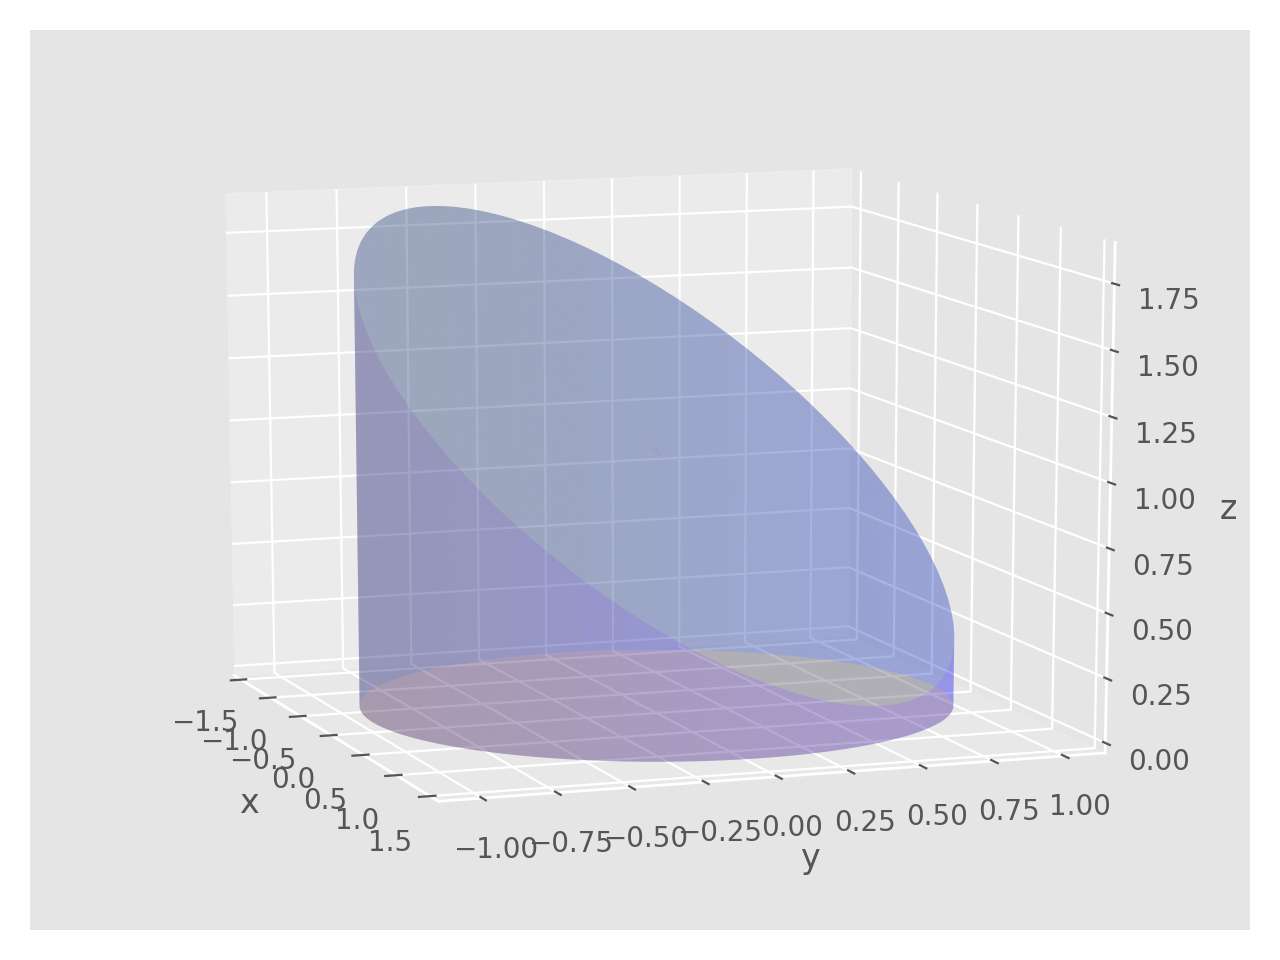

In [47]:
plt.figure()
nbins = 100
ax = plt.gca(projection = '3d')
draw= ax.plot_surface
rm = np.sqrt(2.)
r, phi, z = uvmesh(0., rm, 0., 2 * np.pi, 0., nbins)
draw(r * np.cos(phi), r * np.sin(phi)/rm , z, alpha = 0.2)
r, phi, _ = uvmesh(0., rm, 0., 2. * np.pi, 1., nbins)
draw(r  * np.cos(phi),  r * np.sin(phi)/rm, 1 - r * (np.cos(phi) + np.sin(phi)/rm)/2, alpha = 0.2)
phi, z, r = uvmesh(0., 2 * np.pi, 0., lambda u :  (1 - rm * (np.cos(u) +  np.sin(u)/rm)/2), rm, nbins)
draw(rm * np.cos(phi), np.sin(phi), z, color = 'blue', alpha = 0.2)
plt.xlabel('x'); plt.ylabel(y); ax.set_zlabel('z'); plt.tight_layout();
plt.show();

**Ejercicio 3.3**

El volumen entre las superficies

$$
z = x^2 + y^2, \; z = 8 - x^2 - y^2
$$

Si las reescribimos en polares:

$$
z = r^2, \; z = 8 - r^2
$$

Las dos superficies se unen en la altura:

$$
r^2 = 8 - r^2, \; 2r^2 = 8, \; r^2 = 4, \; r = 2 \rightarrow z = 4 
$$

<IPython.core.display.Javascript object>


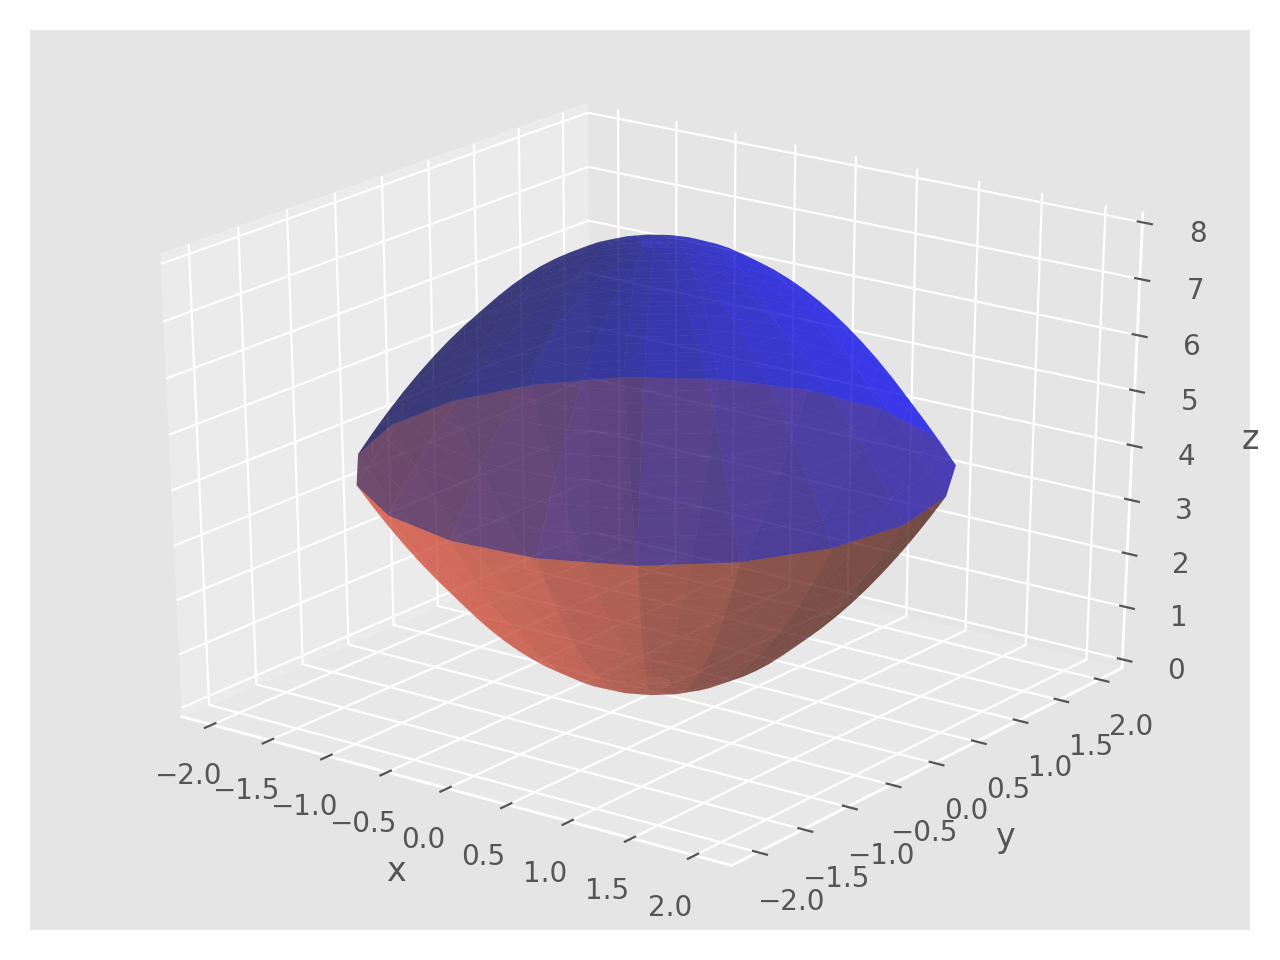

In [48]:
plt.figure(); ax = plt.gca(projection = '3d')
draw = ax.plot_surface
nbins = 20
r, phi, z = uvmesh(0., 2., 0., 2* np.pi, lambda r, phi : r*r, nbins)
draw(r * np.cos(phi), r * np.sin(phi), z, alpha = 0.5)
r, phi, z = uvmesh(0., 2., 0., 2* np.pi, lambda r, phi : 8 - r*r, nbins)
draw(r * np.cos(phi), r * np.sin(phi), z, alpha = 0.5, color = 'blue')
plt.xlabel('x'); plt.ylabel(y); ax.set_zlabel('z'); plt.tight_layout();

In [199]:
r, theta, z = sp.symbols('r theta z')
ui = sp.integrate(r, (z, r**2, 8 - r**2))
print(ui)
ui = sp.integrate(ui, (r, 0, 2))
print(ui)
print(sp.integrate(ui, (theta, 0, 2 * sp.pi)))

-r**3 + r*(8 - r**2)
8
16*pi


In [198]:
d3int(r , (z, r*r, 8 - r*r), (theta, 0, 2 * sp.pi), (r , 0, 2))

16*pi

**Ejercicio 3.4**

Calcular el volumen limitado por:
$$
x^2 + y^2 \le a^2, \; x^2 + z^2 \le a^2
$$

Se trata de dos cilindros infinitos centrados en el origin con radio $a$ y ejes $z$ e $y$.
La zona común es en $x$.

Así el volumen podemos darlo por:

$$
 -a \le r \le a, \; -\sqrt{a^2 - x^2} \le y \le 2 \sqrt{a^2 - x^2}, \;  \sqrt{a^2 - x^2} \le z  \le \sqrt{a^2 - x^2}
$$

$$
\int_{-a}^a \int_{-\sqrt{a^2 - x^2}}^{\sqrt{a^2 - x^2}} \int_{-\sqrt{a^2-x^2}}^{\sqrt{a^2-x^2}} \mathrm{d}x\mathrm{d}y\mathrm{d}z = \\
\int_{-a}^a y \Big|_{-\sqrt{a^2 - x^2}}^{\sqrt{a^2 - x^2}} z \Big|_{-\sqrt{a^2-y^2}}^{\sqrt{a^2-y^2}} \mathrm{d}x = \\
\int_{-a}^a 4 (a^2 - x^2) \, \mathrm{d} = 4 \left( a^2 x - \frac{x^3}{3} \right) \Big|_{-a}^a = \frac{16}{3}a^3 
$$

<IPython.core.display.Javascript object>


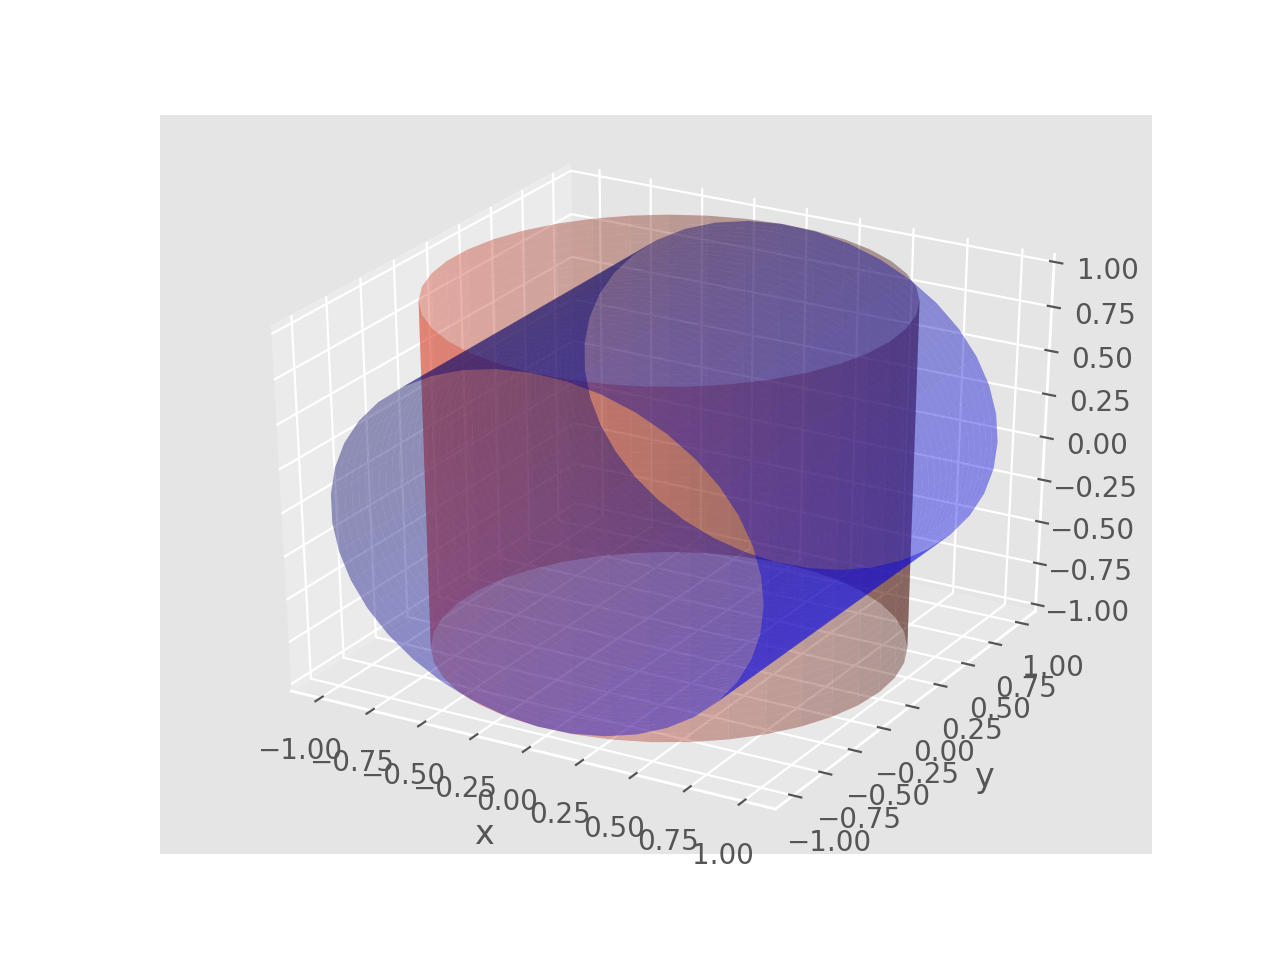

In [54]:
nbins     = 40
z, phi, r = uvmesh(-1., 1., 0., 2*np.pi, 1, nbins)
plt.figure(); ax = plt.gca(projection = '3d');
draw = ax.plot_surface
draw( r * np.cos(phi), r * np.sin(phi), z, alpha = 0.4)
draw( r * np.cos(phi), z, r * np.sin(phi), alpha = 0.4, color = 'blue')
plt.xlabel('x'); plt.ylabel('y');

<IPython.core.display.Javascript object>


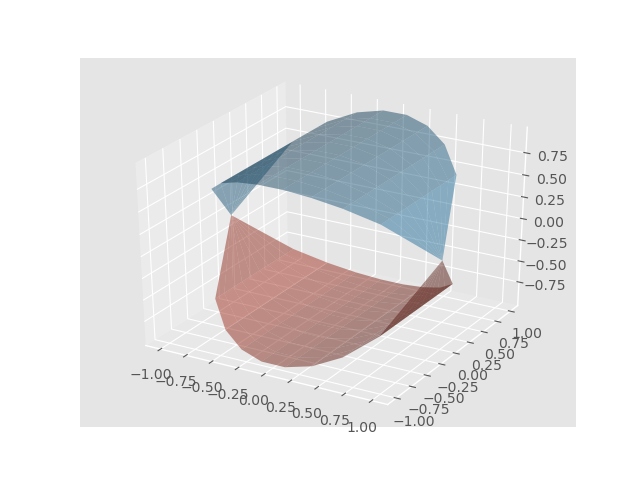

In [58]:
a = 1.
y0, y1 = lambda x: -np.sqrt(a*a - x*x), lambda x: np.sqrt(a*a - x*x)
z0, z1 = lambda x, y: -np.sqrt(a*a - x*x), lambda x, y: np.sqrt(a*a - x*x)
xx, yy, zz = uvmesh(-a, a, y0, y1, z0) 
plt.figure(); ax = plt.gca(projection = '3d'); draw = ax.plot_surface
draw(xx, yy, zz, alpha = 0.5);
xx, yy, zz = uvmesh(-a, a, y0, y1, z1) 
draw(xx, yy, zz, alpha = 0.5);
#phis, zz, _  = uvmesh(-a, a, lambda y: - np.sqrt(a**2 - y**2), lambda y:  np.sqrt(a**2 - y**2), 1.)
#draw(np.cos(phi), np.sin(phi), zz)

<IPython.core.display.Javascript object>


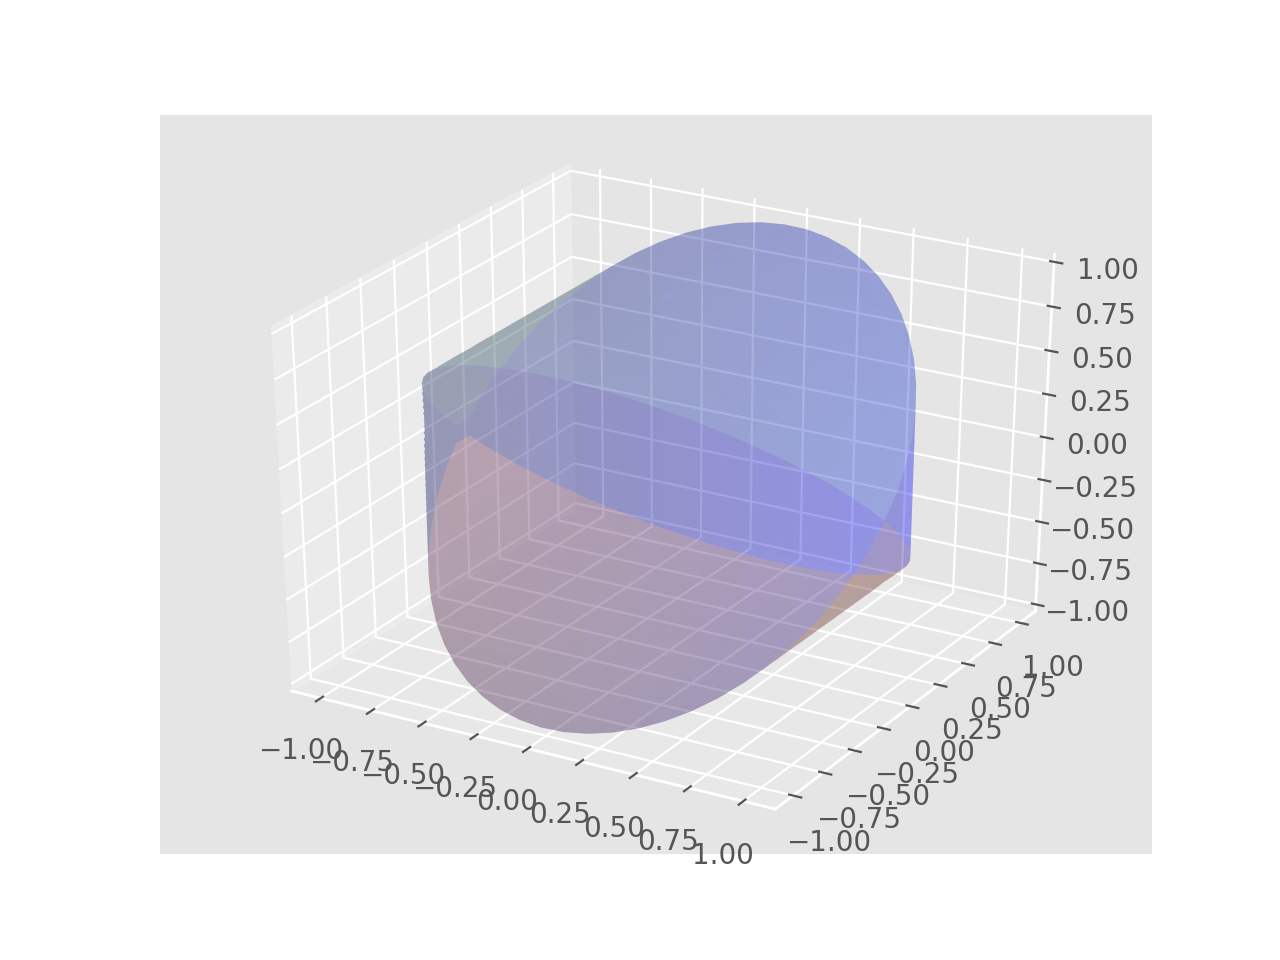

In [53]:
nbins = 60

r, phi, z = uvmesh(0., 1., 0, 2 * np.pi, lambda r, phi : -np.sqrt(1 - r**2 * np.cos(phi)**2), nbins)
plt.figure(); ax = plt.gca(projection = '3d')
draw = ax.plot_surface
draw( r * np.cos(phi), r * np.sin(phi), z, alpha = 0.2);
r, phi, z = uvmesh(0., 1., 0, 2 * np.pi, lambda r, phi : np.sqrt(1 - r**2 * np.cos(phi)**2), nbins)
draw(r * np.cos(phi), r * np.sin(phi), z, alpha = 0.2);
phi, z, r = uvmesh(0, 2 * np.pi, lambda phi : - np.abs(np.sin(phi)), lambda phi : np.abs(np.sin(phi)), 1., nbins)
draw(r * np.cos(phi), r * np.sin(phi), z, alpha = 0.2, color = 'blue')
#plt.show();

In [60]:
a, x, y, z = sp.symbols('a x y z')
d3int(1 , (z, -sp.sqrt(a*a - x*x), sp.sqrt(a*a - x*x)), (y, -sp.sqrt(a*a - x*x), sp.sqrt(a*a - x*x)), (x, -a, a))

16*a**3/3

### Ejercicio 5

Consideramos un tronco cilíndrico de altura 2, radio 1,  y cortado verticalmente en $x = \frac{1}{\sqrt{2}}$

El volumen sería:

$$
0 \le z \le 2, \;\; -1 \le x \le \frac{1}{\sqrt{2}}, \;\; -\sqrt{1-x^2} \le y \le \sqrt{1 - x^2}
$$

$$
\int_0^2 \int_{-1}^{1/\sqrt{2}} \int_{\sqrt{1-x^2}}^{\sqrt{1-x^2}} \mathrm{d}x\mathrm{d}y\mathrm{d}z = \\
 \int_{-1}^{1/\sqrt{2}}  4\sqrt{1-x^2} \mathrm{d}x = \\
$$

con el cambio $x = \cos \phi$, $\mathrm{d}x = - \sin \phi \mathrm{d}\phi$

$$
4 \int_{\pi}^{\pi/4} - \sin^2 \phi  \mathrm{d}\phi = 2 \int_{\pi/2}^{\pi} (1 - \cos 2 \phi) \mathrm{d}\phi = \\
\phi - \sin 2 \phi \Big|_{\pi/4}^\pi = \frac{3\pi}{4} + 1
$$

In [80]:
d3int(1 , (z, 0, 2), (y, -sp.sqrt(1 - x**2), sp.sqrt(1 - x**2)), (x, -1, 1/sp.sqrt(2)))

1 + 3*pi/2

In [81]:
x, y, z = sp.symbols('x y z')
ui = sp.integrate(1, (y, -sp.sqrt(1-x**2), sp.sqrt(1-x**2)))
ui

2*sqrt(1 - x**2)

In [85]:
sp.integrate(4 * sp.sqrt(1 - x**2), x)

2*x*sqrt(1 - x**2) + 2*asin(x)

In [86]:
sp.integrate(4 * sp.sqrt(1 - x**2), (x, -1, 1/sp.sqrt(2)))

1 + 3*pi/2

En cilíndricas la integral tendría dos partes (obviamos la integral en $z$  que vale 2)

$$
i) \int_0^1 \int_{\pi/4}^{2\pi - \pi/4} r \mathrm{d} \mathrm{d}\phi = \frac{r^2}{2} \Big|_0^1 \phi \Big|^{2\pi - \pi/4}_{\pi/4} = \frac{3\pi}{4}
$$

Se cumple que $r_{\mathrm{max}} \cos \phi = \frac{1}{\sqrt{2}}$

$$
ii) \int_{-\pi/4}^{\pi/4} \int_0^{\frac{1}{\sqrt{2}\cos \phi}} r \mathrm{r} \mathrm{d}\phi = 
\int_{-\pi/4}^{\pi/4} \frac{r^{2}}{2} \Big|_0^{\frac{1}{\sqrt{2}\cos \phi}}  \mathrm{r} = \\
\int_{-\pi/4}^{\pi/4} \frac{1}{4 \cos^2 \phi} \mathrm{d}\phi = \frac{1}{4} \tan \phi \Big|_{\pi/4}^{\pi/4} = \frac{1}{2}
$$

Asi pues:

$$
\frac{3 \pi}{2} + 1
$$

### Ejercicio 6

Calcula el volumen limitado por el elipsoide y la condición $x > c/2$ con $c >0$
    
$$
\frac{x^2}{a^2} + \frac{y^2}{b^2} + \frac{z^2}{c^2} = 1
$$

Con el cambio de variables:

$$
x' = a x, \; y' = b y, z' = c z, \rightarrow |J| = a b c
$$

Y nos queda:
$$
x'^2 + y'^2 + z'^2 = 1
$$

que es una esfera:

$$
\int_V \mathrm{d}x\mathrm{d}y\mathrm{d}z = \frac{4 \pi}{3} a b c
$$

La integral en las nuevas variables quedaría:

$$
\int_0^{2\pi} \mathrm{d}\phi \int_{1/2}^1 \mathrm{d}z \int_{0}^{\sqrt{1 - z^2}} r\mathrm{d}r = 
2 \phi \int_{1/2}^1 \frac{r^{2}}{2} \big|_0^{\sqrt{1-z^2}} = \\
\pi \int_{1/2}^1 (1 - z^2) \mathrm{d}z = z - \frac{z^3}{3} \big|_{1/2}^1 = (\frac{2}{3} - \frac{11}{24}) \pi = \frac{5}{24} \pi
$$

Luego: $\frac{11}{25} a bc \pi$

In [87]:
r, z, phi = sp.symbols('r z phi')
d3int(r, (r, 0, sp.sqrt(1-z**2)), (z, 1/2, 1), (phi, 0, 2 * sp.pi))

0.208333333333333*pi

In [91]:
ui = sp.simplify(sp.integrate(sp.integrate(r, (r, 0, sp.sqrt(1-z**2))), (phi, 0, 2*sp.pi)))
ui

pi*(1 - z**2)

In [93]:
sp.integrate(ui, z)

-pi*z**3/3 + pi*z

### Ejercicio 7

Calcula  en un disco de radio $a$ y haz $a \to \infty$
$$
\int_R e^{- (x^2 + y^2)} \mathrm{d}x\mathrm{d}y
$$

¿Cuánto es la norma, $N$, de $f(x) = N e^{-x^2}$, para que $\int_{-\infty}^{\infty} N e^{-x^2} \mathrm{d}x = 1$

En polares
$$
\int_0^a \int_0^{2\pi} e^{-r^2} r \mathrm{d}r\mathrm{\phi} = 2\pi \frac{-1}{2} e^{-r^2} \Big|_0^a = \pi (1 - e^{-a^2})
$$

en el caso $a\to \infty$, la integral vale: $\pi$

Si hacemos

$$
\left[ \int e^{-x^2} \mathrm{dx} \right]^2 = \pi
$$

Entonces la norma de la función es: 
$$
N = \frac{1}{\sqrt{\pi}}
$$